# Case Stusy : Lending club

## Requirement :

### Analyse the given data set and draw out conclusion like whether the customer is likely to default the loan repayment or complete the payment. This is important as it could help identify losses (bad debts) and profits. 
### Data is a dump of records so proper cleaning and pruning is required.

## Imports & Configs

In [303]:
import  pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## importing datetime for extracting year and month from date
import datetime as dt

## importing warnings to ignore version related warnings.
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [304]:
loans = pd.read_csv("loan.csv")
loans.shape

(39717, 111)

In [305]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# Data Cleaning
## Identifying columns to clean

In [306]:
loans.isnull().sum().sort_values(ascending = False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

In [307]:
# identify columns which are  null
null_col = loans.columns[loans.isnull().sum() > 39700]
null_col.size


54

In [308]:
# removing columns with mostly null
loans.drop(null_col, axis=1, inplace=True)
loans.shape

(39717, 57)

In [309]:
# We still see columns with a lot of null values. Let's filter out columns with 90% null values
loans.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [310]:
ninety_percent_null = loans.shape[0] * 0.9
print(ninety_percent_null)
more_null_columns = loans.columns[loans.isnull().sum() > ninety_percent_null]
loans.drop(more_null_columns, axis=1, inplace=True)
loans.shape

35745.3


(39717, 55)

### Checking each rows for null values and removing rows with more than 5 null values. 

In [311]:
# pull out the count of all rows which have null values
loans.isnull().sum(axis=1).value_counts()

1    21394
2     8868
0     8238
3      881
4      319
5       13
6        4
dtype: int64

In [312]:
#Cleaning rows which has 5 or more null values 
rows_to_drop = loans.isnull().sum(axis=1) >= 5
loans = loans[~rows_to_drop]
loans.isnull().sum(axis=1).value_counts()
# loans.drop()

1    21394
2     8868
0     8238
3      881
4      319
dtype: int64

### Finding Unique value counts in the remaining columns.

In [313]:
## Finding Unique value counts in the remaining columns.

def uniqueCounts(df):
    for i in df.columns:
        print("Unique Values count in {0} : {1}".format(i, len(df[i].unique())))


uniqueCounts(loans) 

Unique Values count in id : 39700
Unique Values count in member_id : 39700
Unique Values count in loan_amnt : 885
Unique Values count in funded_amnt : 1041
Unique Values count in funded_amnt_inv : 8205
Unique Values count in term : 2
Unique Values count in int_rate : 371
Unique Values count in installment : 15376
Unique Values count in grade : 7
Unique Values count in sub_grade : 35
Unique Values count in emp_title : 28816
Unique Values count in emp_length : 12
Unique Values count in home_ownership : 5
Unique Values count in annual_inc : 5316
Unique Values count in verification_status : 3
Unique Values count in issue_d : 55
Unique Values count in loan_status : 3
Unique Values count in pymnt_plan : 1
Unique Values count in url : 39700
Unique Values count in desc : 26521
Unique Values count in purpose : 14


Unique Values count in title : 19602
Unique Values count in zip_code : 823
Unique Values count in addr_state : 50
Unique Values count in dti : 2868
Unique Values count in delinq_2yrs : 11
Unique Values count in earliest_cr_line : 526
Unique Values count in inq_last_6mths : 9
Unique Values count in mths_since_last_delinq : 96
Unique Values count in open_acc : 40
Unique Values count in pub_rec : 5
Unique Values count in revol_bal : 21706
Unique Values count in revol_util : 1090
Unique Values count in total_acc : 82
Unique Values count in initial_list_status : 1
Unique Values count in out_prncp : 1137
Unique Values count in out_prncp_inv : 1138
Unique Values count in total_pymnt : 37834
Unique Values count in total_pymnt_inv : 37501
Unique Values count in total_rec_prncp : 7974
Unique Values count in total_rec_int : 35137
Unique Values count in total_rec_late_fee : 1356
Unique Values count in recoveries : 4038
Unique Values count in collection_recovery_fee : 2615
Unique Values count in la

In [314]:
columnsToBeDropped2 = ['member_id','pymnt_plan', 'initial_list_status', 'policy_code', 'application_type',
                      'acc_now_delinq', 'delinq_amnt', 'tax_liens', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths']

loans = loans.drop(columnsToBeDropped2, axis = 1)

### Identifying and dropping the columns which are resulting details of loan repayment process so not directly required. 

In [315]:
columnsToBeDropped3 = ['funded_amnt', 'funded_amnt_inv', 'collection_recovery_fee', 'delinq_2yrs', 'earliest_cr_line', 
                        'last_pymnt_amnt','last_pymnt_d', 'out_prncp', 'out_prncp_inv','desc', 'recoveries', 'total_pymnt', 
                        'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp','mths_since_last_delinq']

loans = loans.drop(columnsToBeDropped3, axis=1)

loans.shape

(39700, 28)

### Identyfing and removing column which does not have significant impact on analysis like address details of borrower.

In [316]:
columnsToBeDropped4 = ['emp_title', 'url', 'title', 'zip_code', 'addr_state', 'inq_last_6mths', 'open_acc', 'total_acc', 'last_credit_pull_d' ]

loans = loans.drop(columnsToBeDropped4, axis=1)

loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39700 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39700 non-null  int64  
 1   loan_amnt             39700 non-null  int64  
 2   term                  39700 non-null  object 
 3   int_rate              39700 non-null  object 
 4   installment           39700 non-null  float64
 5   grade                 39700 non-null  object 
 6   sub_grade             39700 non-null  object 
 7   emp_length            38628 non-null  object 
 8   home_ownership        39700 non-null  object 
 9   annual_inc            39700 non-null  float64
 10  verification_status   39700 non-null  object 
 11  issue_d               39700 non-null  object 
 12  loan_status           39700 non-null  object 
 13  purpose               39700 non-null  object 
 14  dti                   39700 non-null  float64
 15  pub_rec            

## Identifying the columns which required data format correction 
### Columns type has to be correct for proper utilization in visualization. 

In [317]:
# months column has to be numeric 
loans['term'] = loans['term'].str.replace(' months','')

In [318]:
# Standardising text  for int_rate
loans['int_rate'] = loans['int_rate'].str.replace('%','')
loans['int_rate'] = loans['int_rate'].astype(float)
# loans.rename(columns={'int_rate': 'int_rate_in_percent'}, inplace=True)
# loans['int_rate_in_percent']

In [319]:
# #Standardising text  for emp_length
pattern = r'\d+'
loans['emp_length'] = loans['emp_length'].str.extract(r'(\d+)')
loans['emp_length']

0        10
1         1
2        10
3        10
4         1
         ..
39708     4
39711     5
39712     4
39713     3
39716     1
Name: emp_length, Length: 39700, dtype: object

### Identifying the column with missing details and filling with mean/median/mode 

In [320]:
# Here missing value varies between 1 and 10, Using mean as filler would be accurate as it could give average of all other values. 
emp_length_mean = int(loans['emp_length'][~loans['emp_length'].isnull()].astype(int).mean())
loans['emp_length'] = loans['emp_length'].fillna(emp_length_mean)
loans['emp_length'] = loans['emp_length'].astype(int)
# loans.rename(columns= {'emp_length': 'emp_length_in_years'}, inplace = True)
# loans['emp_len gth_in_years'].value_counts()

In [321]:
## Imputing mode value here as it gives accurate option to fill missing values
loans['revol_util'] = loans['revol_util'].fillna(loans['revol_util'].mode()[0])
loans['revol_util'] = loans['revol_util'].apply(lambda x : float(x.rstrip('%')))
loans.rename(columns= {'revol_util': 'revol_util_percent'}, inplace = True)
loans['revol_util_percent'].value_counts()

0.00     1025
0.20       63
63.00      62
66.70      58
40.70      58
         ... 
25.74       1
0.83        1
24.65       1
10.61       1
7.28        1
Name: revol_util_percent, Length: 1089, dtype: int64

In [322]:
# Imputing mode for null values in the column 'pub_rec_bankruptcies'
loans['pub_rec_bankruptcies'] = loans['pub_rec_bankruptcies'].fillna(loans['pub_rec_bankruptcies'].mode()[0])
loans['pub_rec_bankruptcies'].value_counts()

0.0    38019
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [323]:
## Checking all the null values in dataframe to verify if all the nulls have been handled
loans.isnull().sum().sort_values(ascending = False)

id                      0
verification_status     0
revol_util_percent      0
revol_bal               0
pub_rec                 0
dti                     0
purpose                 0
loan_status             0
issue_d                 0
annual_inc              0
loan_amnt               0
home_ownership          0
emp_length              0
sub_grade               0
grade                   0
installment             0
int_rate                0
term                    0
pub_rec_bankruptcies    0
dtype: int64

In [324]:
# Checking for duplicate rows
loans.duplicated().sum()

0

In [325]:
# Relevant columns to proceed with
loans.info()
# 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39700 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39700 non-null  int64  
 1   loan_amnt             39700 non-null  int64  
 2   term                  39700 non-null  object 
 3   int_rate              39700 non-null  float64
 4   installment           39700 non-null  float64
 5   grade                 39700 non-null  object 
 6   sub_grade             39700 non-null  object 
 7   emp_length            39700 non-null  int32  
 8   home_ownership        39700 non-null  object 
 9   annual_inc            39700 non-null  float64
 10  verification_status   39700 non-null  object 
 11  issue_d               39700 non-null  object 
 12  loan_status           39700 non-null  object 
 13  purpose               39700 non-null  object 
 14  dti                   39700 non-null  float64
 15  pub_rec            

In [326]:
## Remaning column 'term' to 'term_in_months' to reflect month to be more descriptive
loans.rename(columns= {'term': 'term_in_months'}, inplace = True)
## Cleaning 'term_in_months' column. Removing 'months' from values and converting it to integer.
loans['term_in_months'] = loans['term_in_months'].apply(lambda x: int(x.replace('months', '').strip()))
loans['term_in_months'].value_counts()

36    29079
60    10621
Name: term_in_months, dtype: int64

##### Assumption 6:  The loan status of "Current" does not provide any definitive information to understand if the loan will be Defaulted or Fully_Paid.  These rows can be therfore ignored for all practical purposes.

In [327]:
## Dropping "Current" status loan from the Data Frame, as it does not give any insights 
## as to whether the loan will be defaulted or paidoff. It is currently in OPEN loans.

loans = loans[~(loans['loan_status'] == 'Current')]
loans['loan_status'].value_counts()

Fully Paid     32936
Charged Off     5624
Name: loan_status, dtype: int64

### Derived Metrices

In [328]:
## Updating 'issue_d' column to datetime format
loans['issue_d'] = pd.to_datetime(loans['issue_d'], format='%b-%y')

In [329]:
## Creating derived coulmns of year and month from 'issue_d'

loans['issue_month'] = loans['issue_d'].dt.month
loans['issue_year'] = loans['issue_d'].dt.year

In [330]:
## Creating 'loanToIncome' column

loans['loanToIncome'] = round(loans['loan_amnt'] / loans['annual_inc'], 2)
loans['loanToIncome'].describe()

count    38560.000000
mean         0.185868
std          0.115261
min          0.000000
25%          0.100000
50%          0.160000
75%          0.250000
max          0.830000
Name: loanToIncome, dtype: float64

###### Converting Quantitative data into Categorical data

In [331]:
loans['annual_inc'].describe()

count    3.856000e+04
mean     6.876797e+04
std      6.421824e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.880000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [332]:
## Converting annual Income data to category to get more insight for each segment

loans['annualIncomeCategory'] = pd.cut(loans['annual_inc'], [0, 20000, 40000, 60000, 80000, 1000000], 
                                 labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000+'])

In [333]:
loans['annualIncomeCategory'].value_counts()

40000-60000    11262
80000+          9972
20000-40000     8515
60000-80000     7619
0-20000         1178
Name: annualIncomeCategory, dtype: int64

In [334]:
loans['int_rate'].describe()

count    38560.000000
mean        11.933041
std          3.691149
min          5.420000
25%          8.940000
50%         11.710000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

In [335]:
## Converting interest rate data to category to get more insight for each segment
loans['intRateCategory'] = pd.cut(loans['int_rate'], [0, 5, 10, 15, 20, 25], 
                                 labels=['0-5', '5-10', '10-15', '15-20', '20+'])

In [336]:
loans['intRateCategory'].value_counts()

10-15    18261
5-10     12304
15-20     7226
20+        769
0-5          0
Name: intRateCategory, dtype: int64

In [337]:
loans['loan_amnt'].describe()

count    38560.000000
mean     11049.543568
std       7348.621430
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [338]:
## Converting loan amount data to category to get more insight for each segment
loans['loanAmountCategory'] = pd.cut(loans['loan_amnt'], [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000], 
            labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '30000+'])

In [339]:
loans['loanAmountCategory'].value_counts()

5000-10000     12799
0-5000          9459
10000-15000     7683
15000-20000     4348
20000-25000     2836
30000+           735
25000-30000      700
Name: loanAmountCategory, dtype: int64

In [340]:
loans['dti'].describe()

count    38560.000000
mean        13.274714
std          6.671527
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [341]:
## Converting debt to income data to category to get more insight for each segment
loans['dtiCategory'] = pd.cut(loans['dti'], [0, 5, 10, 15, 20, 25, 30], 
                                 labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25+'])

In [342]:
#Checking number of rows in each category
loans['dtiCategory'].value_counts()

10-15    9626
15-20    8811
5-10     7871
20-25    6575
0-5      4876
25+       623
Name: dtiCategory, dtype: int64

In [343]:
#Checking all the columns and data type after resetting index
loans.reset_index(inplace=True, drop=True)
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38560 entries, 0 to 38559
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    38560 non-null  int64         
 1   loan_amnt             38560 non-null  int64         
 2   term_in_months        38560 non-null  int64         
 3   int_rate              38560 non-null  float64       
 4   installment           38560 non-null  float64       
 5   grade                 38560 non-null  object        
 6   sub_grade             38560 non-null  object        
 7   emp_length            38560 non-null  int32         
 8   home_ownership        38560 non-null  object        
 9   annual_inc            38560 non-null  float64       
 10  verification_status   38560 non-null  object        
 11  issue_d               38560 non-null  datetime64[ns]
 12  loan_status           38560 non-null  object        
 13  purpose         






## Exploratory Data Analysis

##### Creating a correlation matrix to understand the data better, as it can give insights about the influencial data

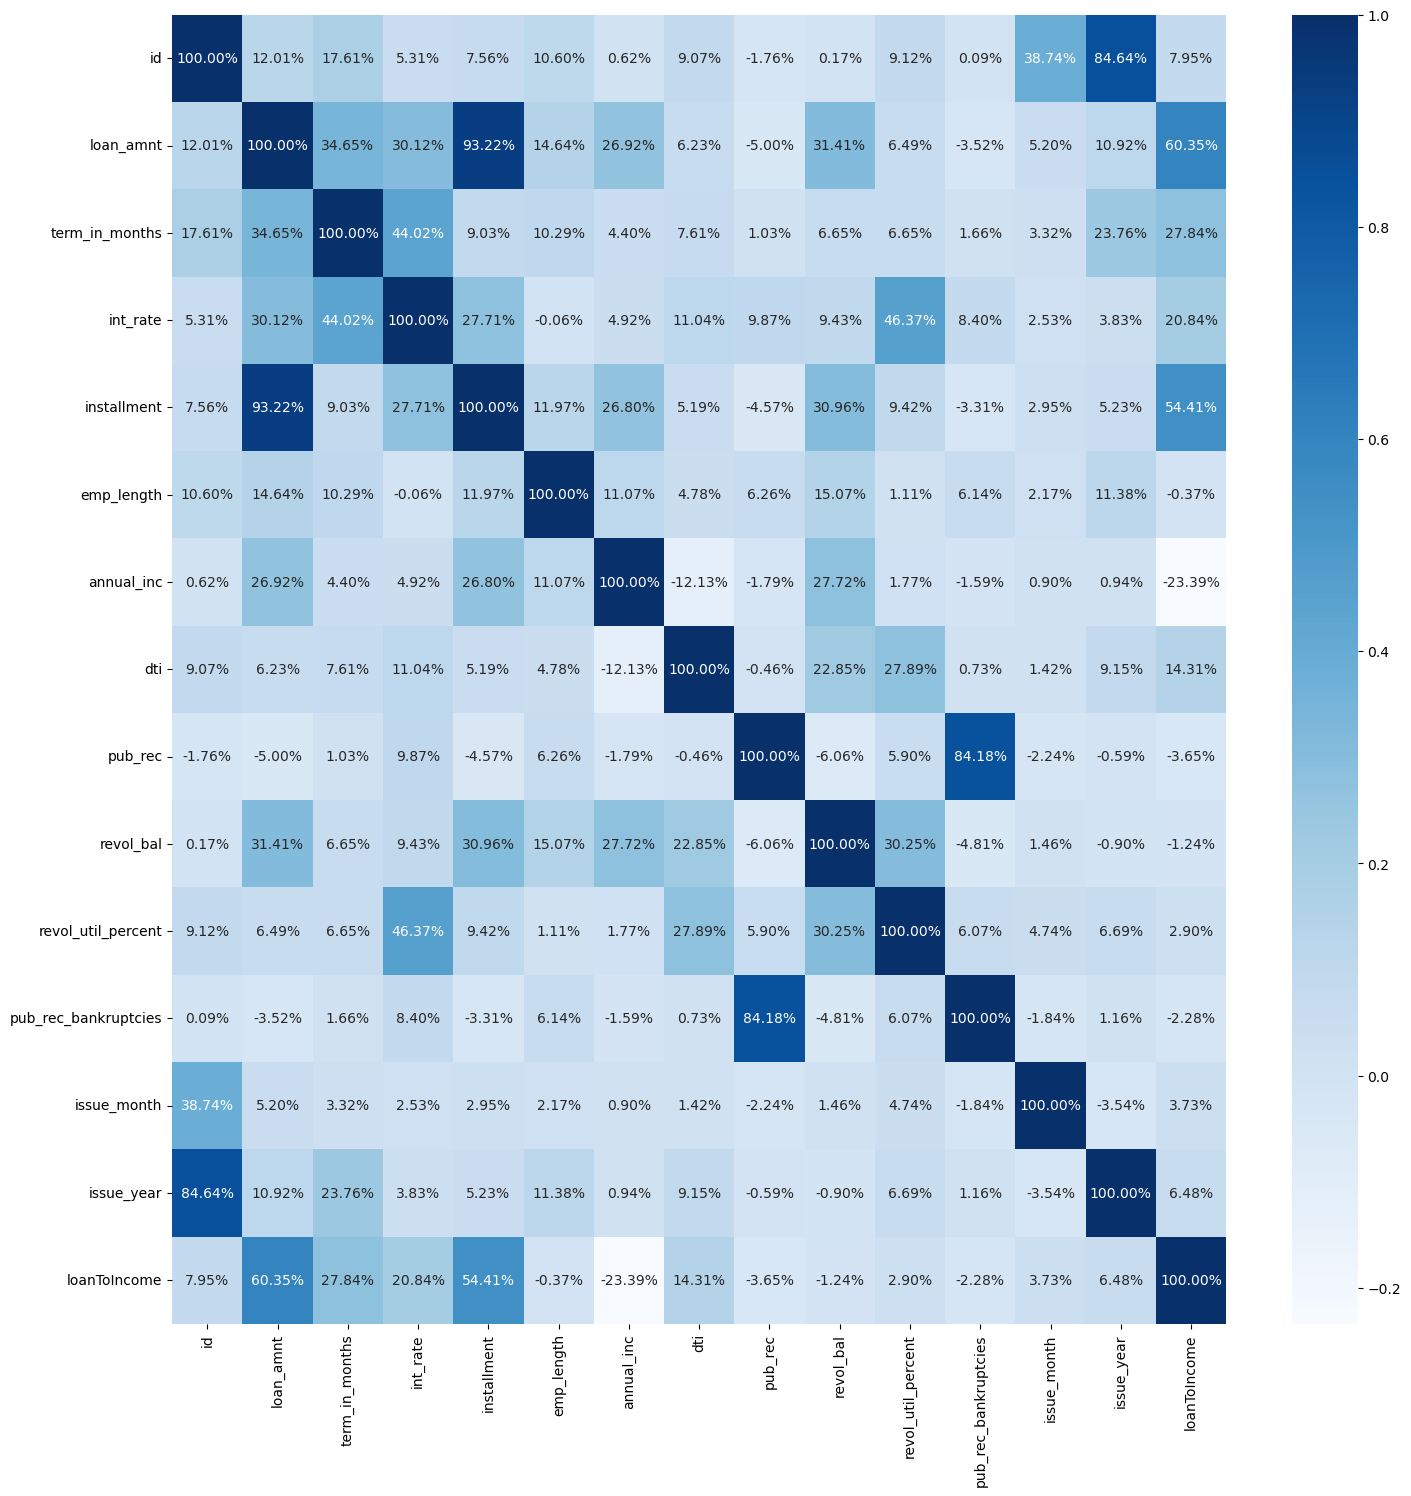

In [344]:
## Creating graph for correlation
corrData = loans.corr()

plt.figure(figsize=[17,17])
sns.heatmap(corrData, cmap="Blues", fmt='.2%', annot=True)
plt.show()


## Observation:
# 1. 'loan_amnt' has strong correlation with 'installment'.
# 2. 'term_in_months' has strong correlation with 'int_rate'.
# 3. 'int_rate' has strong correlation with 'revol_util_percent'.
# 4. 'pub_rec' has strong correlation with 'pub_rec_bankruptcies'.

### Univariate Analysis

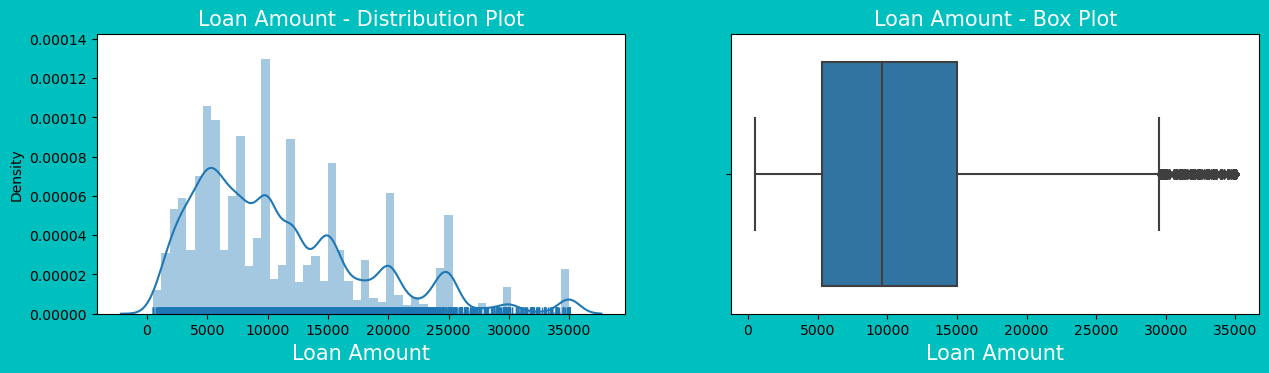

In [345]:
# Univariate Analysis on Loan amount-
## Loan Amount distribution and box plot - Quantitative Variable Analysis


plt.figure(figsize=(15,8),facecolor='c')

# subplot 1
plt.subplot(2, 2, 1)
loanAmountDistPlot = sns.distplot(loans['loan_amnt'], rug=True)
loanAmountDistPlot.set_title('Loan Amount - Distribution Plot',fontsize=15,color='w')
loanAmountDistPlot.set_xlabel('Loan Amount',fontsize=15,color='w')

# subplot 2
plt.subplot(2, 2, 2)
loanAmountBoxPlot = sns.boxplot(x=loans['loan_amnt'])
loanAmountBoxPlot.set_title('Loan Amount - Box Plot',fontsize=15,color='w')
loanAmountBoxPlot.set_xlabel('Loan Amount',fontsize=15,color='w')

plt.show()



# Observations: 
# As evident from the below box plot, maximum loans have been applied for amount between 5K - 15K.




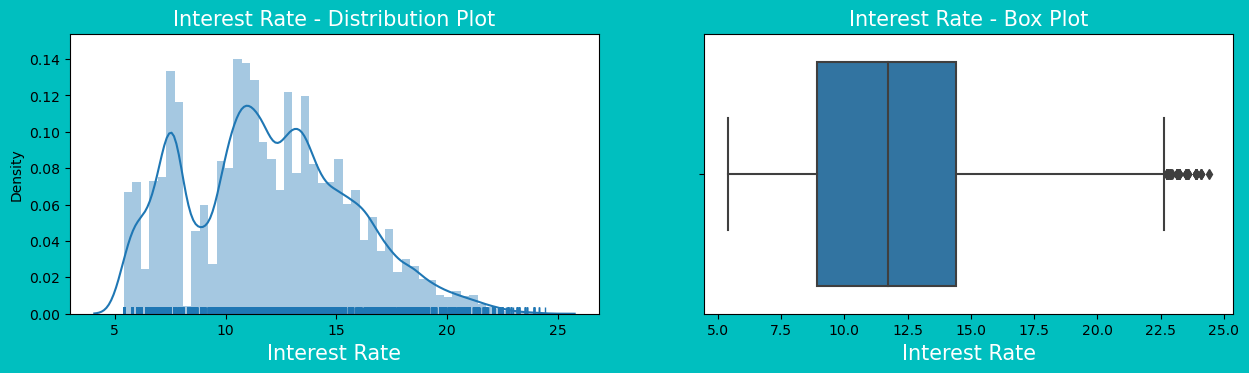

In [346]:
# Univariate Analysis on Interest rate-
## interest rate distribution and box plot - Quantitative Variable Analysis


plt.figure(figsize=(15,8),facecolor='c')

# subplot 1
plt.subplot(2, 2, 1)
intRateDistPlot = sns.distplot(loans['int_rate'], rug=True)
intRateDistPlot.set_title('Interest Rate - Distribution Plot',fontsize=15,color='w')
intRateDistPlot.set_xlabel('Interest Rate',fontsize=15,color='w')

# subplot 2
plt.subplot(2, 2, 2)
intRateBoxPlot = sns.boxplot(x=loans['int_rate'])
intRateBoxPlot.set_title('Interest Rate - Box Plot',fontsize=15,color='w')
intRateBoxPlot.set_xlabel('Interest Rate',fontsize=15,color='w')

plt.show()



# Observations: 
# As evident from the below box plot, maximum loans have interest rate between 9% - 14%. 
# Though there are quite a few interest rates which are on the higher end i.e. more than 20% to 25%.



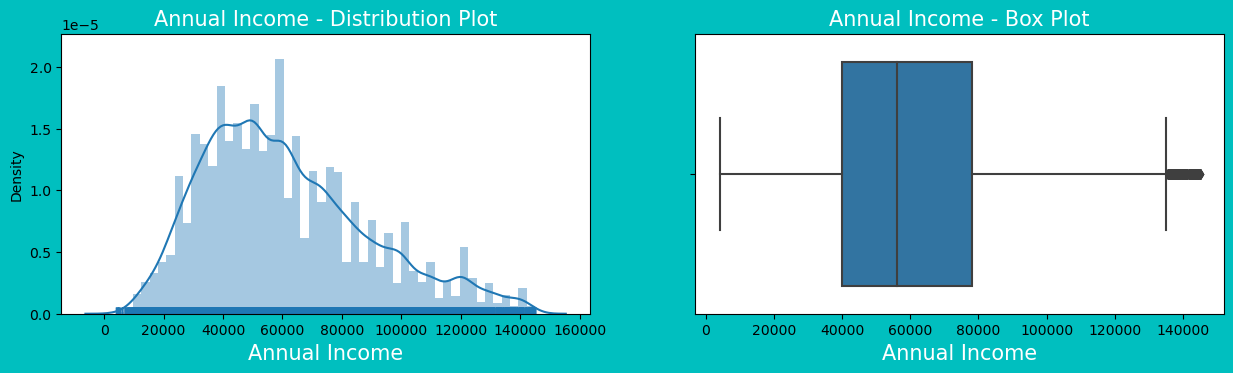

In [347]:
# Univariate Analysis on Annual Income-
## Annual Income distribution and box plot - Quantitative Variable Analysis

### Ignoring very high Annual income values (upper outlier value ~ 145000 calulated by using Q3 + 1.5 IQR)

plt.figure(figsize=(15,8),facecolor='c')

# subplot 1
plt.subplot(2, 2, 1)
annualIncomeDistPlot = sns.distplot(loans[(loans['annual_inc'] < 145000.0)]['annual_inc'], rug=True)
annualIncomeDistPlot.set_title('Annual Income - Distribution Plot',fontsize=15,color='w')
annualIncomeDistPlot.set_xlabel('Annual Income',fontsize=15,color='w')

# subplot 2
plt.subplot(2, 2, 2)
annualIncomeBoxPlot = sns.boxplot(x=loans[(loans['annual_inc'] < 145000.0)]['annual_inc'])
annualIncomeBoxPlot.set_title('Annual Income - Box Plot',fontsize=15,color='w')
annualIncomeBoxPlot.set_xlabel('Annual Income',fontsize=15,color='w')

plt.show()



# Observations: 
# As evident from the below box plot, maximum loans have been applied by the individuals 
# having annual income of 40K - 80K.



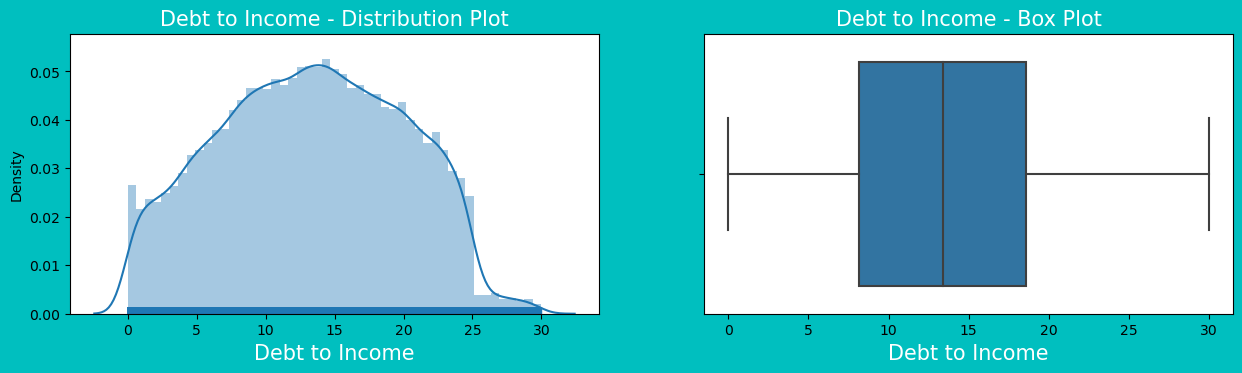

In [348]:
# Univariate Analysis on Debt to Income -
## Debt To Income distribution and box plot - Quantitative Variable Analysis


plt.figure(figsize=(15,8),facecolor='c')

# subplot 1
plt.subplot(2, 2, 1)
dtiDistPlot = sns.distplot(loans['dti'], rug=True)
dtiDistPlot.set_title('Debt to Income - Distribution Plot',fontsize=15,color='w')
dtiDistPlot.set_xlabel('Debt to Income',fontsize=15,color='w')

# subplot 2
plt.subplot(2, 2, 2)
dtiBoxPlot = sns.boxplot(x=loans['dti'])
dtiBoxPlot.set_title('Debt to Income - Box Plot',fontsize=15,color='w')
dtiBoxPlot.set_xlabel('Debt to Income',fontsize=15,color='w')

plt.show()



# Observations: 
# As evident from the below box plot, 
# maximum loans have been applied by individuals having debt to income ratio of 8-18%



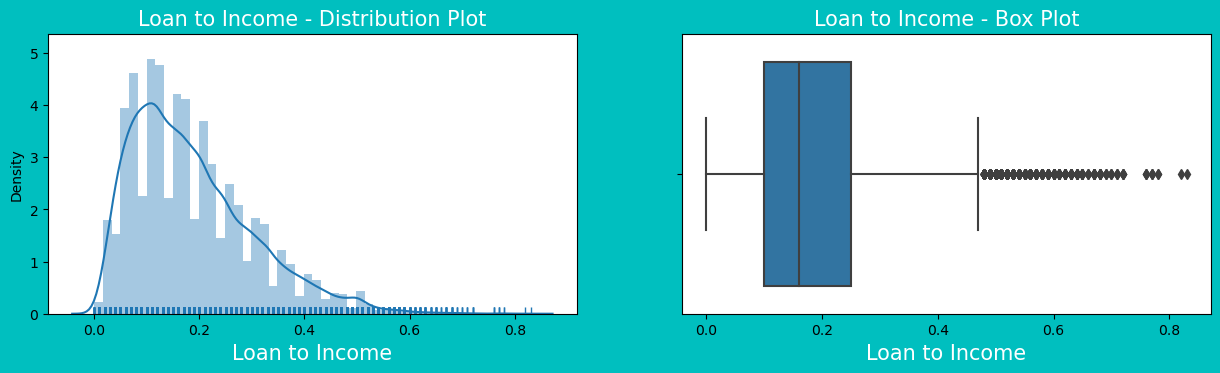

In [349]:
# Univariate Analysis on Loan to Income -
## Loan To Income distribution and box plot - Quantitative Variable Analysis


plt.figure(figsize=(15,8),facecolor='c')

# subplot 1
plt.subplot(2, 2, 1)
ltiDistPlot = sns.distplot(loans['loanToIncome'], rug=True)
ltiDistPlot.set_title('Loan to Income - Distribution Plot',fontsize=15,color='w')
ltiDistPlot.set_xlabel('Loan to Income',fontsize=15,color='w')

# subplot 2
plt.subplot(2, 2, 2)
ltiBoxPlot = sns.boxplot(x=loans['loanToIncome'])
ltiBoxPlot.set_title('Loan to Income - Box Plot',fontsize=15,color='w')
ltiBoxPlot.set_xlabel('Loan to Income',fontsize=15,color='w')

plt.show()



# Observations: 
# As evident from the below box plot, 
# maximum loans have been applied for loan value of 10%-25% of current annual income.


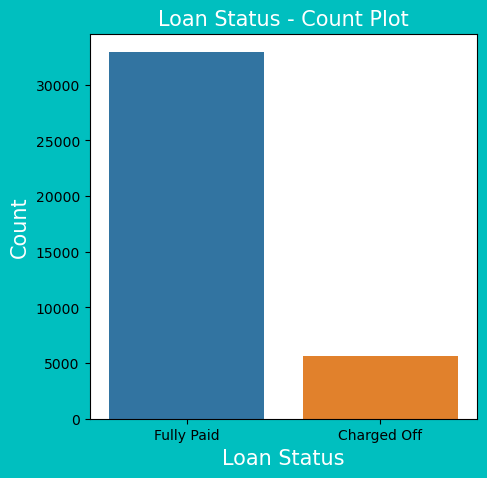

Fully Paid     32936
Charged Off     5624
Name: loan_status, dtype: int64

In [350]:
# Univariate Analysis on Loan Status
## Loan Status Count Plot - Unordered Categorical Variable Analysis

plt.figure(figsize=(5,5),facecolor='c')

loanStatusCountPlot = sns.countplot(x = 'loan_status', data=loans)
loanStatusCountPlot.set_title('Loan Status - Count Plot',fontsize=15,color='w')
loanStatusCountPlot.set_xlabel('Loan Status',fontsize=15,color='w')
loanStatusCountPlot.set_ylabel('Count',fontsize=15,color='w')

plt.show()


loans['loan_status'].value_counts()


# Observation: 
# As checking from the below graph and data below, approximately 15% of total loans are charged off.


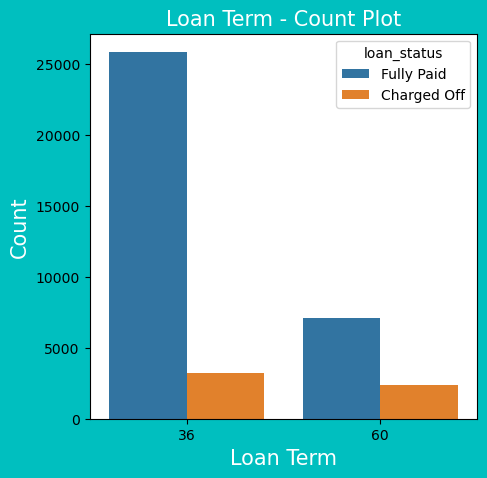

36    29079
60     9481
Name: term_in_months, dtype: int64

In [351]:
# Univariate Analysis on Loan Term -
## Loan Term Count Plot - Categorical Variable Analysis

plt.figure(figsize=(5,5),facecolor='c')

loanTermCountPlot = sns.countplot(x = 'term_in_months', data=loans, hue='loan_status')
loanTermCountPlot.set_title('Loan Term - Count Plot',fontsize=15,color='w')
loanTermCountPlot.set_xlabel('Loan Term',fontsize=15,color='w')
loanTermCountPlot.set_ylabel('Count',fontsize=15,color='w')

plt.show()


loans['term_in_months'].value_counts()


# Observation: 
# As checking from the below graph and data below, 
# approximately 25% of total loans are applied for the term of 36 months.

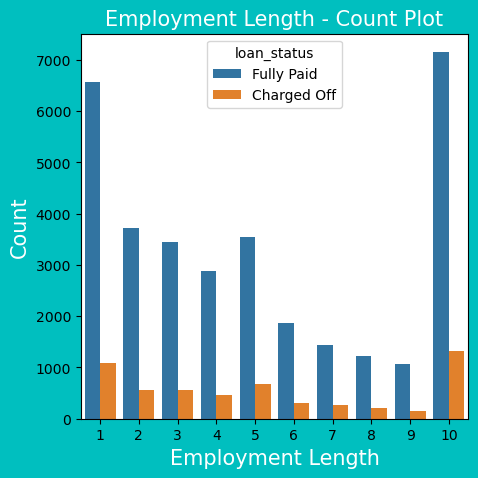

10    8486
1     7667
2     4291
5     4224
3     4012
4     3341
6     2167
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

In [352]:
# Univariate Analysis on Employment Length -
## Employment Length Count Plot - Categorical Variable Analysis

plt.figure(figsize=(5,5),facecolor='c')

empTermCountPlot = sns.countplot(x = 'emp_length', data=loans, hue='loan_status')
empTermCountPlot.set_title('Employment Length - Count Plot',fontsize=15,color='w')
empTermCountPlot.set_xlabel('Employment Length',fontsize=15,color='w')
empTermCountPlot.set_ylabel('Count',fontsize=15,color='w')

plt.show()


loans['emp_length'].value_counts()


# Observation: 
# As checking from the below graph and data below, 
# most of the loans have been applied for individuals having employment over 10 or more years. 
# Also, individuals employed for 0, 2 and 3 years have similar loan counts.


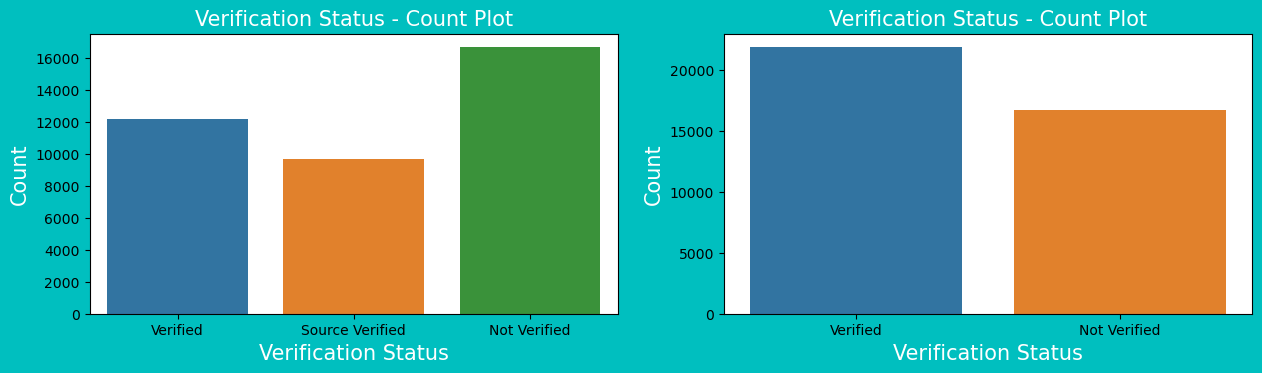

In [353]:
# Univariate Analysis on Verification Status-
## Verification Status Count Plot - Categorical Variable Analysis

plt.figure(figsize=(15,8),facecolor='c')

# subplot 1
plt.subplot(2, 2, 1)
verificationStatusCountPlot = sns.countplot(x = 'verification_status', data=loans)
verificationStatusCountPlot.set_title('Verification Status - Count Plot',fontsize=15,color='w')
verificationStatusCountPlot.set_xlabel('Verification Status',fontsize=15,color='w')
verificationStatusCountPlot.set_ylabel('Count',fontsize=15,color='w')


# combining "Verified" and "Source Verified" status into 1.
verifiedStautsDF = loans['verification_status'].apply(lambda x :'Verified' if 
                                        (x=='Verified' or x == 'Source Verified')  else 'Not Verified')

# subplot 2
plt.subplot(2, 2, 2)
verificationStatusCountPlot = sns.countplot(x = verifiedStautsDF, data= verifiedStautsDF)
verificationStatusCountPlot.set_title('Verification Status - Count Plot',fontsize=15,color='w')
verificationStatusCountPlot.set_xlabel('Verification Status',fontsize=15,color='w')
verificationStatusCountPlot.set_ylabel('Count',fontsize=15,color='w')

plt.show()


# Observation: 
# As checking from the below graph and data below, most of the loans have been applied for individuals 
# without the verification (considering Verified and Source_Verified as different status).
# However if we combine Source Verified and Verified status, maximum loans have been provided to verified individuals.
# We can safely assume that Source Verified and Verified status to be same as Verified for all practical purposes.


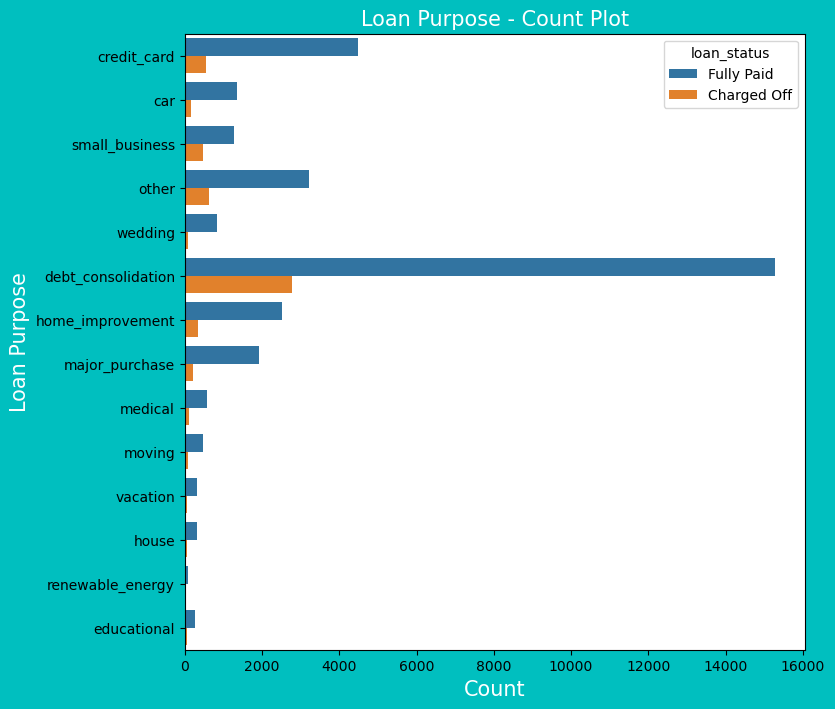

debt_consolidation    18053
credit_card            5023
other                  3861
home_improvement       2872
major_purchase         2150
small_business         1753
car                    1499
wedding                 926
medical                 681
moving                  575
vacation                375
house                   366
educational             324
renewable_energy        102
Name: purpose, dtype: int64

In [354]:
# Univariate Analysis on Purpose -
## Purpose Count Plot - Categorical Variable Analysis

plt.figure(figsize=(8,8),facecolor='c')

purposeCountPlot = sns.countplot(y = 'purpose', data=loans, hue='loan_status')
purposeCountPlot.set_title('Loan Purpose - Count Plot',fontsize=15,color='w')
purposeCountPlot.set_ylabel('Loan Purpose',fontsize=15,color='w')
purposeCountPlot.set_xlabel('Count',fontsize=15,color='w')

plt.show()


loans['purpose'].value_counts()


# Observation: 
# As checking from the below graph and data below, 
# most of the loans have been applied for debt consolidation (approx 40% of total loan), 
# followed by credit card, others and home improvement.



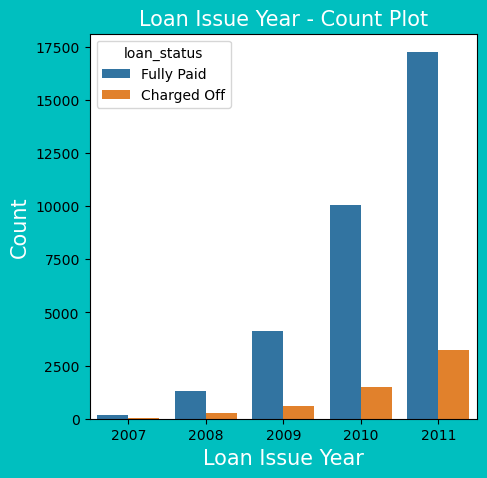

2011    20513
2010    11532
2009     4716
2008     1562
2007      237
Name: issue_year, dtype: int64

In [355]:
# Univariate Analysis on Loan Issue year -
## Loan Issue year Count Plot - Categorical Variable Analysis

plt.figure(figsize=(5,5),facecolor='c')

issueYearCountPlot = sns.countplot(x = 'issue_year', data=loans, hue='loan_status')
issueYearCountPlot.set_title('Loan Issue Year - Count Plot',fontsize=15,color='w')
issueYearCountPlot.set_xlabel('Loan Issue Year',fontsize=15,color='w')
issueYearCountPlot.set_ylabel('Count',fontsize=15,color='w')

plt.show()


loans['issue_year'].value_counts()


# Observation: 
# As checking from the below graph and data below, most of the loans have been applied in the year 2011. 
# It appears to be an exponential year to year growth from 2007 to 2011.



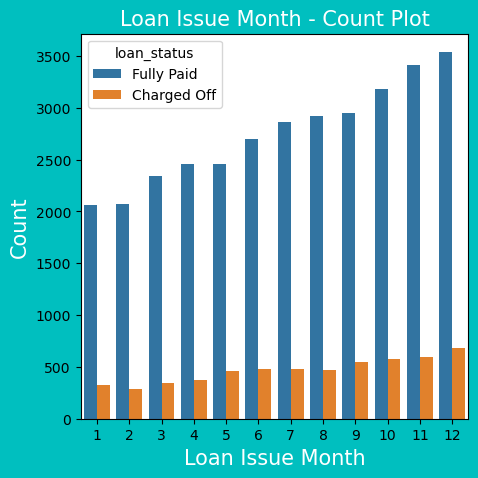

12    4215
11    4005
10    3761
9     3496
8     3383
7     3343
6     3180
5     2918
4     2831
3     2691
1     2379
2     2358
Name: issue_month, dtype: int64

In [356]:
# Univariate Analysis on Loan Issue Month -
## Loan Issue Month Count Plot - Ordered Categorical Variable Analysis

plt.figure(figsize=(5,5),facecolor='c')

issueYearCountPlot = sns.countplot(x = 'issue_month', data=loans, hue='loan_status')
issueYearCountPlot.set_title('Loan Issue Month - Count Plot',fontsize=15,color='w')
issueYearCountPlot.set_xlabel('Loan Issue Month',fontsize=15,color='w')
issueYearCountPlot.set_ylabel('Count',fontsize=15,color='w')

plt.show()


loans['issue_month'].value_counts()


### Observation: 
# As checking from the below graph and data below, most of the loans have been applied in the month of December.
# It appears to be a trend of increaing in loan application as the months passes.


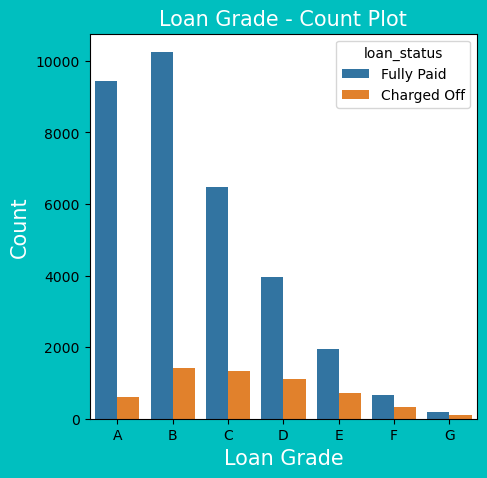

B    11671
A    10037
C     7831
D     5085
E     2662
F      975
G      299
Name: grade, dtype: int64

In [357]:
# Univariate Analysis on Grade -
## Grade Count Plot - Categorical Variable Analysis

plt.figure(figsize=(5,5),facecolor='c')

gradeCountPlot = sns.countplot(x = 'grade', data=loans, hue='loan_status', order = 'ABCDEFG')
gradeCountPlot.set_title('Loan Grade - Count Plot',fontsize=15,color='w')
gradeCountPlot.set_xlabel('Loan Grade',fontsize=15,color='w')
gradeCountPlot.set_ylabel('Count',fontsize=15,color='w')

plt.show()


loans['grade'].value_counts()


### Observation: 
# As checking from the below graph and data below, 
# the loans issued have been decreasing with the decrease in grade except for grade A and grade B.
# Very less percent of loans have been issued for grade G.


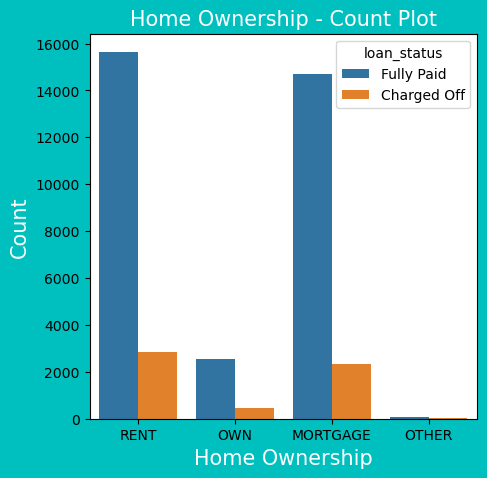

home_ownership  loan_status
RENT            Fully Paid     15638
MORTGAGE        Fully Paid     14687
RENT            Charged Off     2838
OWN             Fully Paid      2530
MORTGAGE        Charged Off     2325
OWN             Charged Off      443
OTHER           Fully Paid        80
                Charged Off       18
dtype: int64

In [358]:
# Univariate Analysis on Home Ownership -
## Home Ownership Count Plot - Categorical Variable Analysis

## 'home_ownership' has just 3 rows for 'NONE'. Ignoring 3 NONE - home ownership type
homeOwnershipDF = loans[~(loans['home_ownership'] == 'NONE')][['home_ownership', 'loan_status']]

plt.figure(figsize=(5,5),facecolor='c')

homeOwnCountPlot = sns.countplot(x = 'home_ownership', data=homeOwnershipDF, hue='loan_status')
homeOwnCountPlot.set_title('Home Ownership - Count Plot',fontsize=15,color='w')
homeOwnCountPlot.set_xlabel('Home Ownership',fontsize=15,color='w')
homeOwnCountPlot.set_ylabel('Count',fontsize=15,color='w')

plt.show()


homeOwnershipDF.value_counts()


# Observation: 
# As checking from the below graph and data, RENT and MORTGAGE Ownership type accounts for approx 90% of all loans.


### Bivariate Analysis

In [359]:
## Bivariate Analysis - Annual Income Category and Loan Amount

plt.figure(figsize=(10,5),facecolor='c')

plot = sns.barplot(y='loan_amnt', x = 'annualIncomeCategory', hue = 'loan_status', data= loans, estimator=np.median)
plot.set_title('Annual Income Vs Loan Amount',fontsize=15,color='w')
plot.set_xlabel('Annual Income',fontsize=15,color='w')
plot.set_ylabel('Loan Amount',fontsize=15,color='w')

plt.show()


## Observation: 
## The loan are getting charged off for more loan amount in the same income category group.
## That means that within the same income category group, individuals who have taken more loan runs a risk to default.


NameError: name 'np' is not defined

<Figure size 1000x500 with 0 Axes>

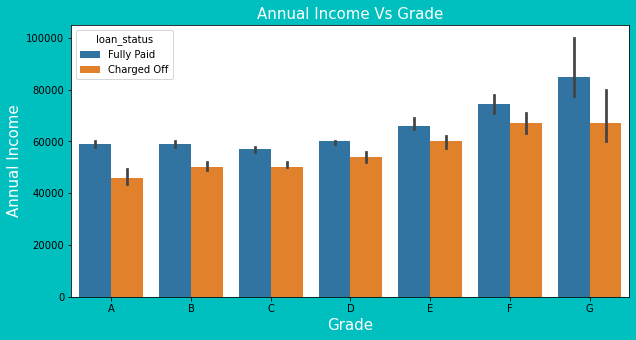

In [ ]:
## Bivariate Analysis - Annual Income and Grade

plt.figure(figsize=(10,5),facecolor='c')

plot = sns.barplot(x='grade', y = 'annual_inc', hue = 'loan_status', data= loans, estimator=np.median, order='ABCDEFG')
plot.set_title('Annual Income Vs Grade',fontsize=15,color='w')
plot.set_ylabel('Annual Income',fontsize=15,color='w')
plot.set_xlabel('Grade',fontsize=15,color='w')

plt.show()


## Observation: 
## In the same Grade, the loans getting charged Off belongs to individual who have less annual income.


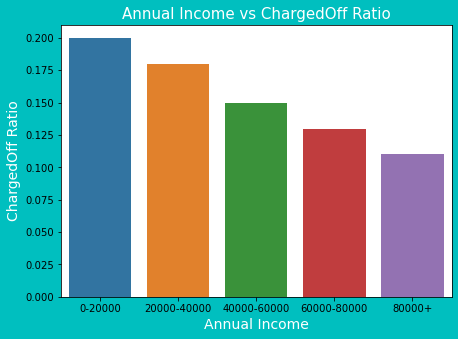

In [ ]:
## Bivariate Analysis - Annual Income Category And ChargeOff Ratio

annualIncomeDF = loans.groupby(['annualIncomeCategory', 'loan_status']).loan_status.count().unstack().reset_index()
annualIncomeDF['Total'] = annualIncomeDF['Charged Off'] + annualIncomeDF['Fully Paid'] 
annualIncomeDF['ChargedOff_Ratio'] = round(annualIncomeDF['Charged Off'] / annualIncomeDF['Total'], 2)
annualIncomeDF.sort_values('ChargedOff_Ratio', ascending=False)


plt.figure(figsize=(7,5),facecolor='c')

plot=sns.barplot(x='annualIncomeCategory', y='ChargedOff_Ratio', data=annualIncomeDF)
plot.set_title('Annual Income vs ChargedOff Ratio',fontsize=15,color = 'w')
plot.set_ylabel('ChargedOff Ratio',fontsize=14,color = 'w')
plot.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

# Observations:
# 1. Annual Income of 80000+ has least Charged Off ratio i.e. least risk of loan getting charged off.
# 2. Annual Income of less than 20000 has most Charged Off ratio i.e. highest risk of loan getting charged off.
# 3. With increase in annual income, risk of loan getting Charged off is reducing.

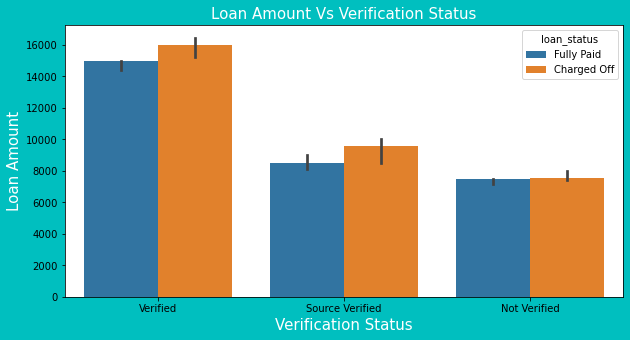

In [ ]:
## Bivariate Analysis -  Loan Amount and Verification Status

plt.figure(figsize=(10,5),facecolor='c')

plot = sns.barplot(y='loan_amnt', x = 'verification_status', hue = 'loan_status', data= loans, estimator= np.median)
plot.set_title('Loan Amount Vs Verification Status',fontsize=15,color='w')
plot.set_ylabel('Loan Amount',fontsize=15,color='w')
plot.set_xlabel('Verification Status',fontsize=15,color='w')

plt.show()


## Observation: 
## The individuals who have been verified have chances of getting higher loan amount. 
## Also, the chargeoff loans have higher loan amount compared to fully Paid loans. 


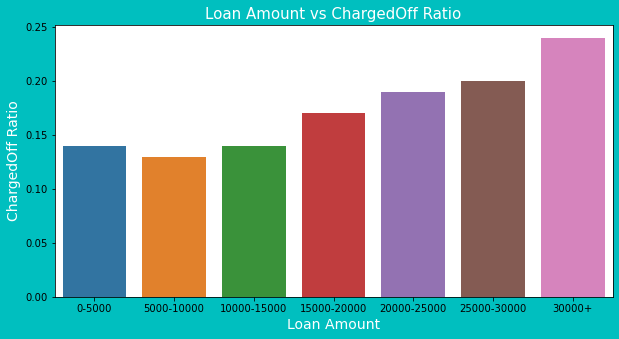

In [ ]:
## Bivariate Analysis - Loan Amount Category And Loan ChargeOff Ratio

loanAmountDF = loans.groupby(['loanAmountCategory', 'loan_status']).loan_status.count().unstack().reset_index()
loanAmountDF['Total'] = loanAmountDF['Charged Off'] + loanAmountDF['Fully Paid'] 
loanAmountDF['ChargedOff_Ratio'] = round(loanAmountDF['Charged Off'] / loanAmountDF['Total'], 2)
loanAmountDF.sort_values('ChargedOff_Ratio', ascending=False)


plt.figure(figsize=(10,5),facecolor='c')

plot=sns.barplot(x='loanAmountCategory', y='ChargedOff_Ratio', data=loanAmountDF)
plot.set_title('Loan Amount vs ChargedOff Ratio',fontsize=15,color = 'w')
plot.set_ylabel('ChargedOff Ratio',fontsize=14,color = 'w')
plot.set_xlabel('Loan Amount',fontsize=14,color='w')
plt.show()

# Observations:
# 1. Loan Amount of 30000+ has most Charged Off ratio i.e. highest risk of loan getting charged off.
# 2. Loan Amount of less than 15000 has less Charged Off ratio i.e. lower risk of loan getting charged off.
# 3. With increase in loan amount (esp. above 15000), risk of loan getting Charged off is increasing.

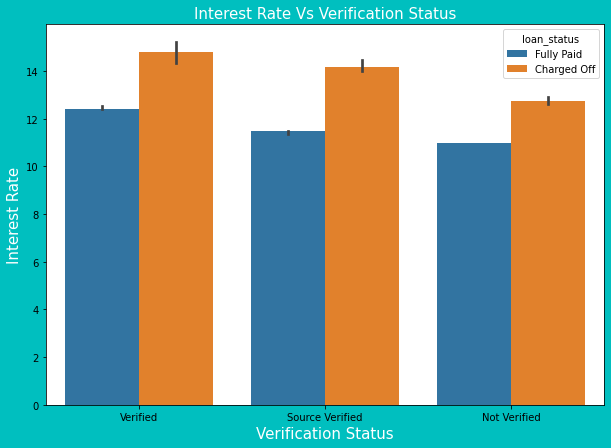

In [ ]:
## Bivariate Analysis - verification Status and Interest rate

plt.figure(figsize=(10,7),facecolor='c')

plot = sns.barplot(y='int_rate', x = 'verification_status', hue = 'loan_status', data= loans, estimator= np.median)
plot.set_title('Interest Rate Vs Verification Status',fontsize=15,color='w')
plot.set_ylabel('Interest Rate',fontsize=15,color='w')
plot.set_xlabel('Verification Status',fontsize=15,color='w')

plt.show()


## Observation: The chargeoff loans have higher interest rate 
## compared to fully Paid loans irrespective of verification status.


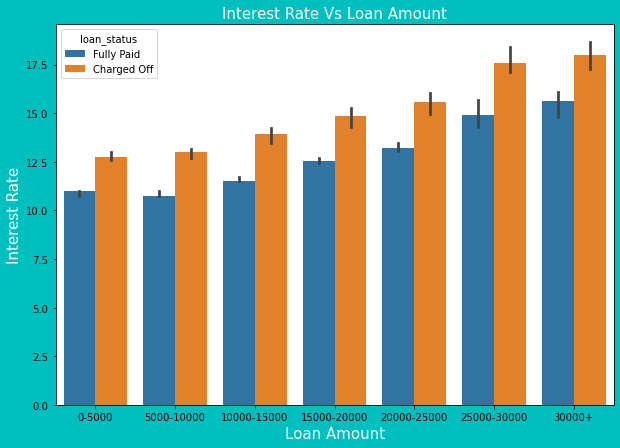

In [ ]:
## Bivariate Analysis - Loan Amount Category and Interest rate

plt.figure(figsize=(10,7),facecolor='c')

plot = sns.barplot(y='int_rate', x = 'loanAmountCategory', hue = 'loan_status', data= loans, estimator= np.median)
plot.set_title('Interest Rate Vs Loan Amount',fontsize=15,color='w')
plot.set_ylabel('Interest Rate',fontsize=15,color='w')
plot.set_xlabel('Loan Amount',fontsize=15,color='w')

plt.show()


## Observation: As the loan amount increases, the interest rates charged also increases.
## The charged off loans also increases with increase in Loan amount and interest rates.


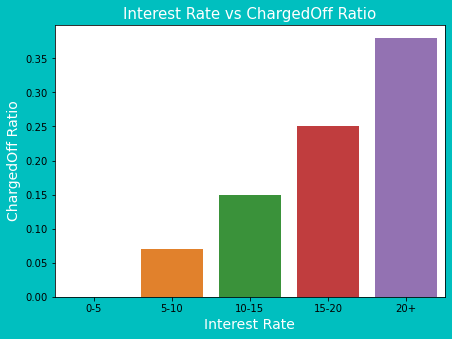

In [ ]:
## Bivariate Analysis - Interest rate Category and ChargeOff Ratio

intRateDF = loans.groupby(['intRateCategory', 'loan_status']).loan_status.count().unstack().reset_index()
intRateDF['Total'] = intRateDF['Charged Off'] + intRateDF['Fully Paid'] 
intRateDF['ChargedOff_Ratio'] = round(intRateDF['Charged Off'] / intRateDF['Total'], 2)
intRateDF.sort_values('ChargedOff_Ratio', ascending=False)

plt.figure(figsize=(7,5),facecolor='c')

plot=sns.barplot(x='intRateCategory', y='ChargedOff_Ratio', data=intRateDF)
plot.set_title('Interest Rate vs ChargedOff Ratio',fontsize=15,color = 'w')
plot.set_ylabel('ChargedOff Ratio',fontsize=14,color = 'w')
plot.set_xlabel('Interest Rate',fontsize=14,color='w')
plt.show()

# Observations:
# 1. Interest rate of 20+ has most Charged Off ratio i.e. highest risk of loan getting charged off.
# 2. Interest rate of less than 10 has least Charged Off ratio i.e. lowest risk of loan getting charged off.
# 3. With increase in interest rate, risk of loan getting Charged off is increasing.

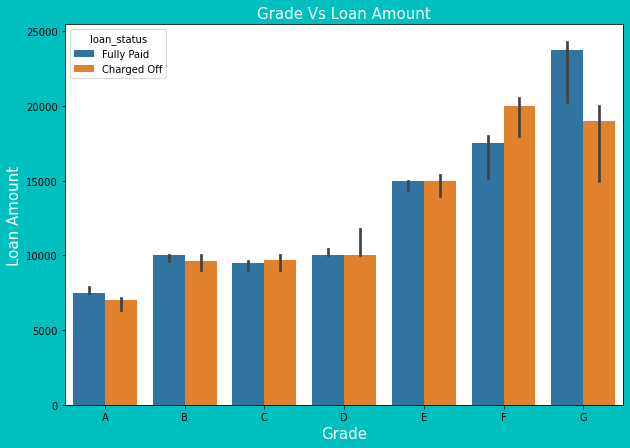

In [ ]:
## Bivariate Analysis - Loan Amount and Grade

plt.figure(figsize=(10,7),facecolor='c')

plot = sns.barplot(y='loan_amnt', x = 'grade', hue = 'loan_status', data= loans, estimator= np.median, order = 'ABCDEFG')
plot.set_title('Grade Vs Loan Amount',fontsize=15,color='w')
plot.set_ylabel('Loan Amount',fontsize=15,color='w')
plot.set_xlabel('Grade',fontsize=15,color='w')

plt.show()


## Observation: It seems that the Grades are assigned based on Loan Amount.
## Greater the loan Amount, worse the grade.
## Also, the tendency of loan getting charged off increases with bad grades.


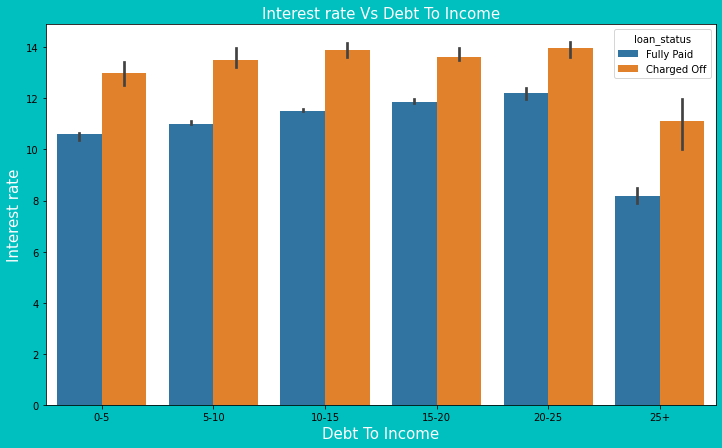

In [ ]:
## Bivariate Analysis - Debt to Income Category and Interest Rate

plt.figure(figsize=(12,7),facecolor='c')

plot = sns.barplot(y='int_rate', x = 'dtiCategory', hue = 'loan_status', data= loans, estimator= np.median)
plot.set_title('Interest rate Vs Debt To Income',fontsize=15,color='w')
plot.set_ylabel('Interest rate',fontsize=15,color='w')
plot.set_xlabel('Debt To Income',fontsize=15,color='w')

plt.show()


## Observation: There is an increasing trend of interest rate as DTI increases,
## with an exception of 25+ DTI category where the interest rate falls sharply.


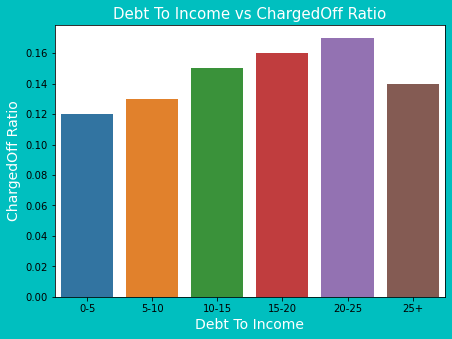

In [ ]:
## Bivariate Analysis - Debt To Income Category And Loan Charge Off Ratio

dtiDF = loans.groupby(['dtiCategory', 'loan_status']).loan_status.count().unstack().reset_index()
dtiDF['Total'] = dtiDF['Charged Off'] + dtiDF['Fully Paid'] 
dtiDF['ChargedOff_Ratio'] = round(dtiDF['Charged Off'] / dtiDF['Total'], 2)
dtiDF.sort_values('ChargedOff_Ratio', ascending=False)

plt.figure(figsize=(7,5),facecolor='c')

plot=sns.barplot(x='dtiCategory', y='ChargedOff_Ratio', data=dtiDF)
plot.set_title('Debt To Income vs ChargedOff Ratio',fontsize=15,color = 'w')
plot.set_ylabel('ChargedOff Ratio',fontsize=14,color = 'w')
plot.set_xlabel('Debt To Income',fontsize=14,color='w')
plt.show()

# Observations:
# 1. Debt to income ratio of 20-25 has most Charged Off ratio i.e. highest risk of loan getting charged off.
# 2. Debt to income ratio below 5 has least Charged Off ratio i.e. lowest risk of loan getting charged off.
# 3. With increase in debt to income ratio, risk of loan getting Charged off is increasing. However, dti ratio of 25+ 
#    is witnessing decrease in chargeoff ratio.

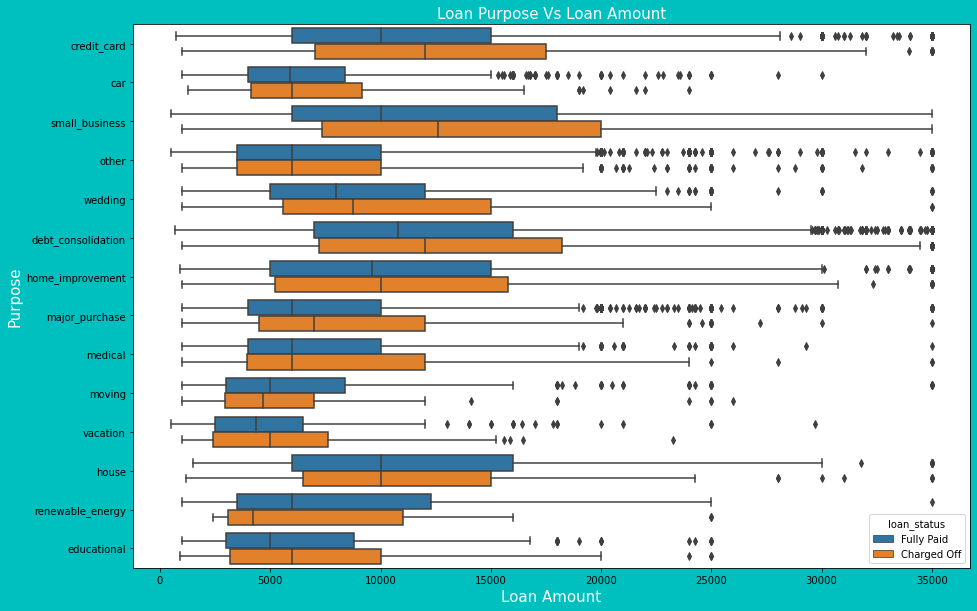

In [ ]:
## Bivariate Analysis - Loan Purpose and Loan Amount

plt.figure(figsize=(15,10),facecolor='c')

plot = sns.boxplot(y='purpose', data= loans, x = 'loan_amnt', hue='loan_status')
plot.set_title('Loan Purpose Vs Loan Amount',fontsize=15,color='w')
plot.set_xlabel('Loan Amount',fontsize=15,color='w')
plot.set_ylabel('Purpose',fontsize=15,color='w')

plt.show()


## Observation: Most of the chargedOff loans are Small Business. In other words, we can say that
## lending to small business carries greater risk, followed by 'Debt Consolidation' and Credit Card.


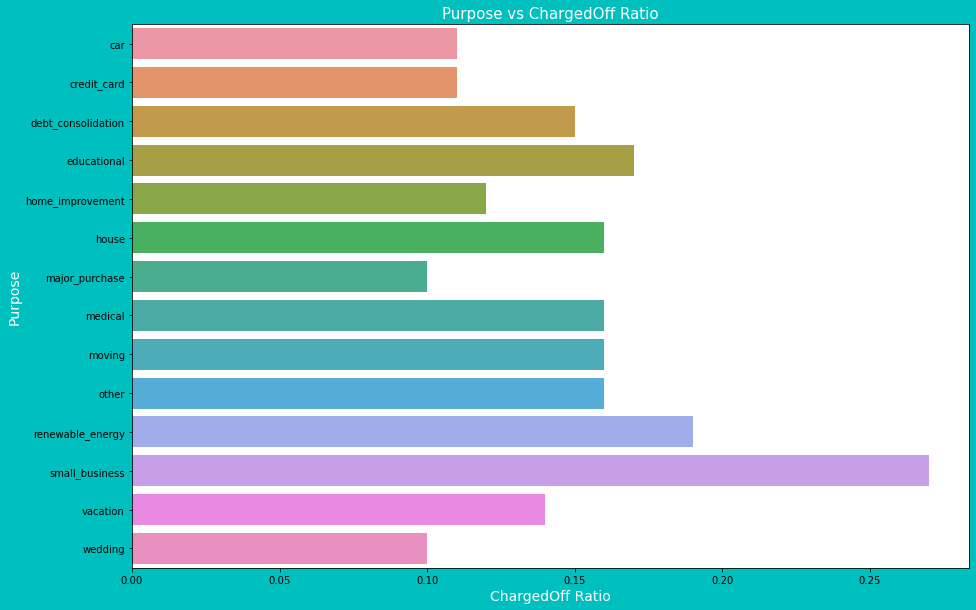

In [ ]:
## Bivariate Analysis - Purpose And Chareg off Ratio

purposeDF = loans.groupby(['purpose', 'loan_status']).loan_status.count().unstack().reset_index()
purposeDF['Total'] = purposeDF['Charged Off'] + purposeDF['Fully Paid'] 
purposeDF['ChargedOff_Ratio'] = round(purposeDF['Charged Off'] / purposeDF['Total'], 2)
purposeDF.sort_values('ChargedOff_Ratio', ascending=False)


plt.figure(figsize=(15,10),facecolor='c')

plot=sns.barplot(y='purpose', x='ChargedOff_Ratio', data=purposeDF)
plot.set_title('Purpose vs ChargedOff Ratio',fontsize=15,color = 'w')
plot.set_xlabel('ChargedOff Ratio',fontsize=14,color = 'w')
plot.set_ylabel('Purpose',fontsize=14,color='w')
plt.show()

# Observations:
# 1. Small Business - loan purpose has very high charge off ratio compared to other purpose. 
# Small Business carries a significant amount of high Charge Off risk.
# renewable_energy and education also has high charge off ratios.

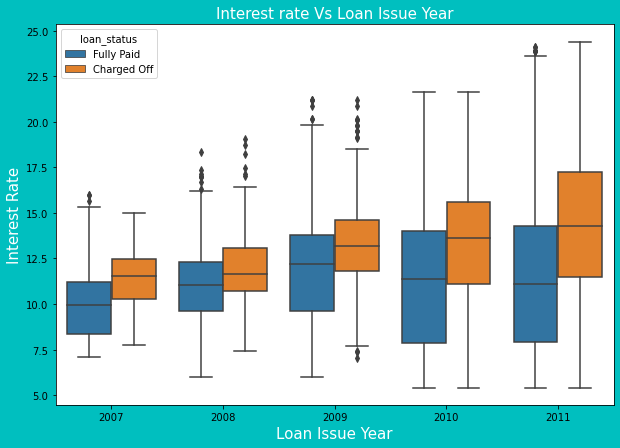

In [ ]:
## Bivariate Analysis - Interest Rate and Loan Issue year

plt.figure(figsize=(10,7),facecolor='c')

plot = sns.boxplot(y='int_rate', x = 'issue_year', hue = 'loan_status', data= loans)
plot.set_title('Interest rate Vs Loan Issue Year',fontsize=15,color='w')
plot.set_ylabel('Interest Rate',fontsize=15,color='w')
plot.set_xlabel('Loan Issue Year',fontsize=15,color='w')

plt.show()


## Observation: The interest rate have been slowly increasing over the years.
## Also, the variance in the interest rate ia also increasing over the years.


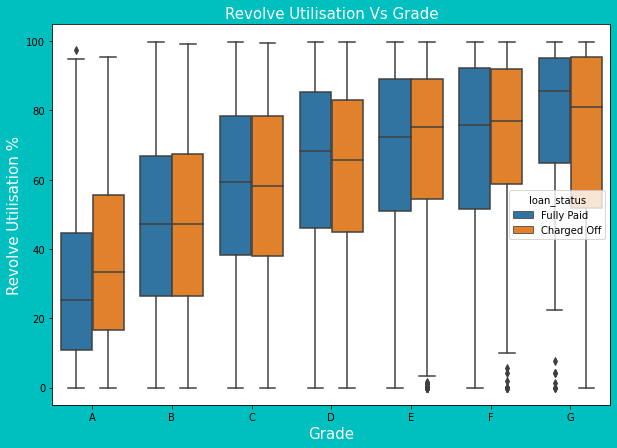

In [ ]:
## Bivariate Analysis - Revolve Utilisation Vs Grade

plt.figure(figsize=(10,7),facecolor='c')

plot = sns.boxplot(y='revol_util_percent', x = 'grade', hue = 'loan_status', data= loans, order = 'ABCDEFG')
plot.set_title('Revolve Utilisation Vs Grade',fontsize=15,color='w')
plot.set_xlabel('Grade',fontsize=15,color='w')
plot.set_ylabel('Revolve Utilisation %',fontsize=15,color='w')

plt.show()


## Observation: The revolve utilisation is increasing as the Grade of the loan is worsening.


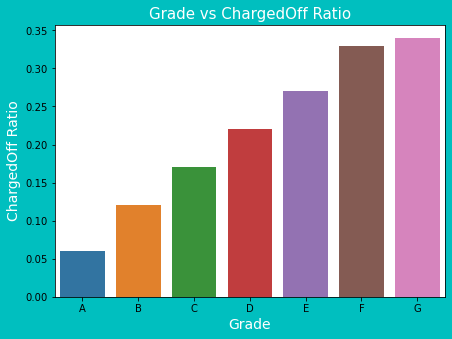

In [ ]:
## Bivariate Analysis - Grades and Charge Off Ratio

gradeDF = loans.groupby(['grade', 'loan_status']).loan_status.count().unstack().reset_index()
gradeDF['Total'] = gradeDF['Charged Off'] + gradeDF['Fully Paid'] 
gradeDF['ChargedOff_Ratio'] = round(gradeDF['Charged Off'] / gradeDF['Total'], 2)
gradeDF.sort_values('ChargedOff_Ratio', ascending=False)


plt.figure(figsize=(7,5),facecolor='c')

plot=sns.barplot(x='grade', y='ChargedOff_Ratio', data=gradeDF)
plot.set_title('Grade vs ChargedOff Ratio',fontsize=15,color = 'w')
plot.set_ylabel('ChargedOff Ratio',fontsize=14,color = 'w')
plot.set_xlabel('Grade',fontsize=14,color='w')
plt.show()

# Observations:
# 1. "G" grade has most Charged Off ratio i.e. highest risk of loan getting charged off.
# 2. Grade "A" loans has least Charged Off ratio i.e. lowest risk of loan getting charged off.
# 3. With worsening of Grades of loan, risk of loan getting Charged off is increasing.

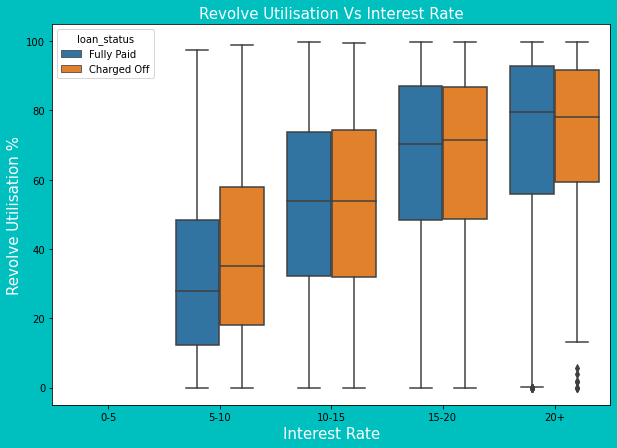

In [ ]:
## Bivariate Analysis - Revolve Utilisation Vs Interest Rate

plt.figure(figsize=(10,7),facecolor='c')

plot = sns.boxplot(y='revol_util_percent', x = 'intRateCategory', hue = 'loan_status', data= loans)
plot.set_title('Revolve Utilisation Vs Interest Rate',fontsize=15,color='w')
plot.set_xlabel('Interest Rate',fontsize=15,color='w')
plot.set_ylabel('Revolve Utilisation %',fontsize=15,color='w')

plt.show()


## Observation: The interest rate is high for high revolve utilization.


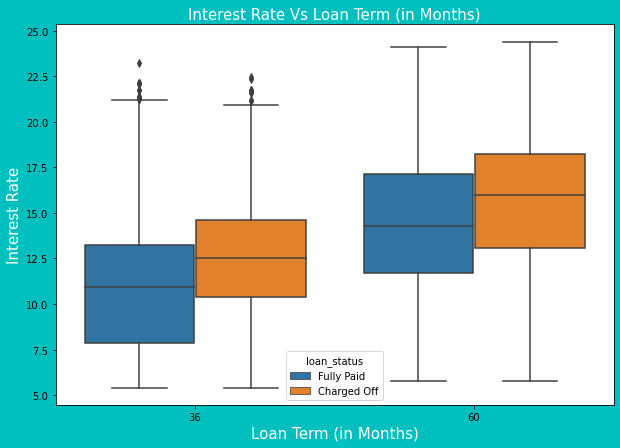

In [ ]:
## Bivariate Analysis - Interest Rate Vs Loan Term

plt.figure(figsize=(10,7),facecolor='c')

plot = sns.boxplot(y='int_rate', x = 'term_in_months', hue = 'loan_status', data= loans)
plot.set_title('Interest Rate Vs Loan Term (in Months)',fontsize=15,color='w')
plot.set_xlabel('Loan Term (in Months)',fontsize=15,color='w')
plot.set_ylabel('Interest Rate',fontsize=15,color='w')

plt.show()


## Observation: Higher interest rates are charged for loans with longer term.


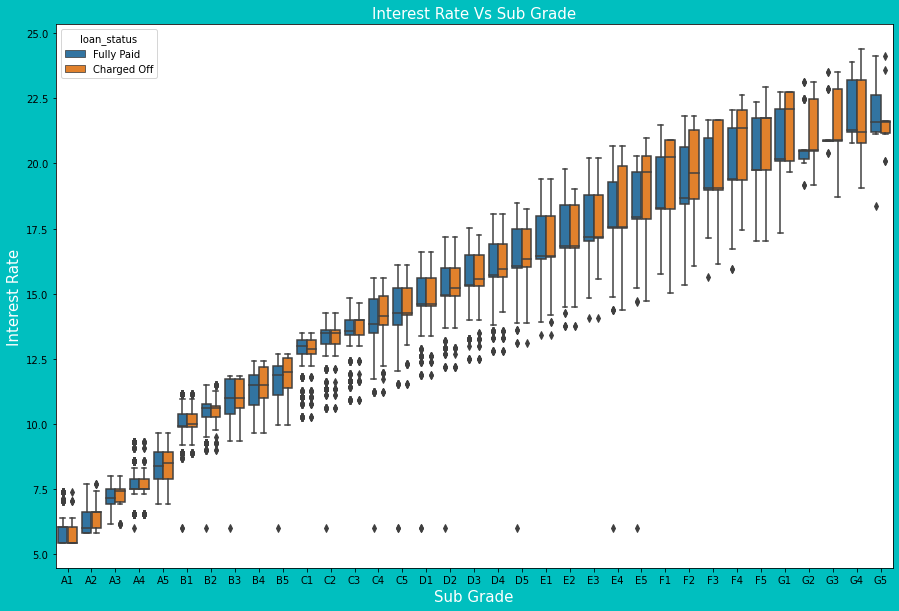

In [ ]:
## Bivariate Analysis - Interest Rate Vs Sub Grades

plt.figure(figsize=(15,10),facecolor='c')
orderby = ['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5',
          'E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5']


plot = sns.boxplot(y='int_rate', x = 'sub_grade', hue = 'loan_status', data= loans, order = orderby)
plot.set_title('Interest Rate Vs Sub Grade',fontsize=15,color='w')
plot.set_xlabel('Sub Grade',fontsize=15,color='w')
plot.set_ylabel('Interest Rate',fontsize=15,color='w')

plt.show()


## Observation: There is a steep rise in interest rates as the subGrades worsens. 
## i.e. worse subgrade attracts more interest rates.


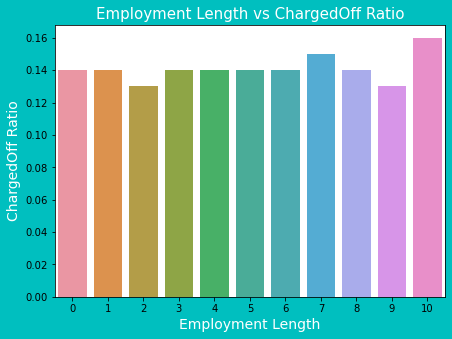

In [ ]:
## Bivariate Analysis - Employment length And Charge Off Ratio

empLengthDF = loans.groupby(['emp_length_in_years', 'loan_status']).loan_status.count().unstack().reset_index()
empLengthDF['Total'] = empLengthDF['Charged Off'] + empLengthDF['Fully Paid'] 
empLengthDF['ChargedOff_Ratio'] = round(empLengthDF['Charged Off'] / empLengthDF['Total'], 2)
empLengthDF.sort_values('ChargedOff_Ratio', ascending=False)


plt.figure(figsize=(7,5),facecolor='c')

plot=sns.barplot(x='emp_length_in_years', y='ChargedOff_Ratio', data=empLengthDF)
plot.set_title('Employment Length vs ChargedOff Ratio',fontsize=15,color = 'w')
plot.set_ylabel('ChargedOff Ratio',fontsize=14,color = 'w')
plot.set_xlabel('Employment Length',fontsize=14,color='w')
plt.show()

# Observations:
# There is no emerging trend from this graph. 
# It seems employment length may not be an influencing factor in loan decisioning.

### Multivariate Analysis - PairPlots

In [ ]:
pairDF = loans[['loan_amnt', 'int_rate', 'annual_inc', 'issue_year', 'loan_status']]

# Converting to log scale as data is highly skewed.
pairDF['loan_amnt'] = np.log10(pairDF['loan_amnt'])
pairDF['int_rate'] = np.log10(pairDF['int_rate'])
pairDF['annual_inc'] = np.log10(pairDF['annual_inc'])


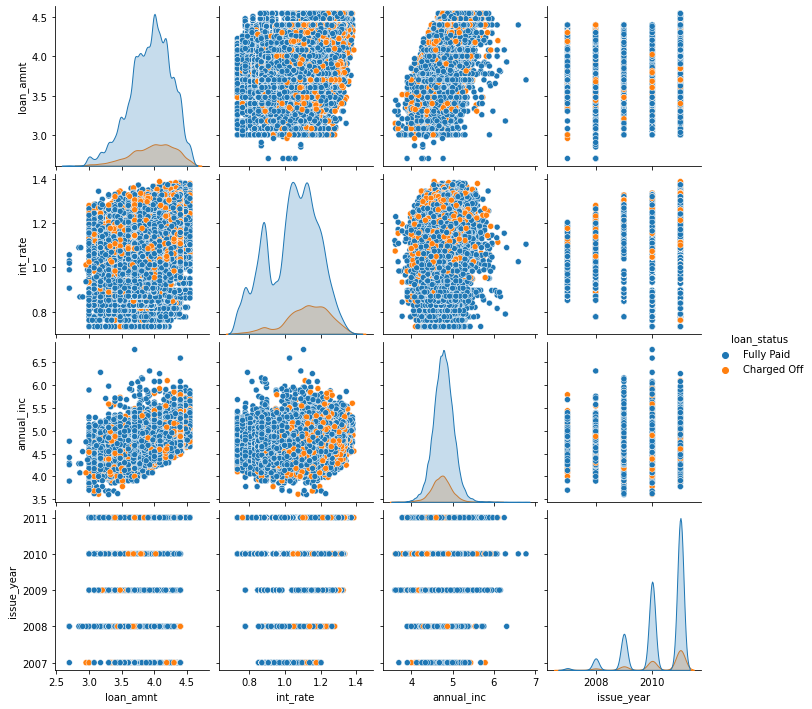

In [ ]:
## Create a pair plot for 'loan_amnt', 'int_rate', 'annual_inc' and 'issue_year' to view their spread and behavior

sns.pairplot(pairDF, hue='loan_status')
plt.show()


# Observations:

# 1. The loan amount is showing tendecy to increase with increase in annual income.
# 2. The loans having higher loan amount or higher interest rates have greater tendency to be defaulted.
# 3. There is exponential increase in loan aplications year on year.

## Conclusion
Based on the above EDA of the loan dataset, we can identify few drivers for the loan approval process.

Driving Factors for loan getting default:

1. Higher Loan Amount (> $30000)

2. Higher interest rate (> 20%)

3. Loan Purpose ( Small Business, Renewable Energy, Education)

4. Higher Revolve Utilization rate (> 75%)

5. Bad Loan Grades (F, G)

6. Lower Annual Income (< $20000)

7. Higher Debt To Income ratio (20% - 25%)

